# HW3: Occupation Dataset

### Introduction:

Special thanks to: https://github.com/guipsamora for sharing his datasets, materials, and questions.

- https://github.com/justmarkham for sharing the dataset and materials.


In [1]:
### Step 0a. Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Step 0b. Import the dataset from this address. https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
### Step 0c. Assign it to a variable called users and use the 'user_id' as index
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [3]:
# Step 1. See the first 5 entries
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [4]:
# Step 2. How many observations and columns are in the data?
users.shape

(943, 4)

In [5]:
# Step 3. How many different occupations there are in this dataset?
users.occupation.value_counts().shape[0]

21

In [6]:
# Step 4. What is the most frequent occupation?
users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [7]:
# Step 5. Discover what is the mean age per occupation.
# Sort the results and find the 3 occupations with the lowest mean age and the 3 with the highest
users.groupby('occupation').age.mean().sort_values()

occupation
student          22.081633
none             26.555556
entertainment    29.222222
artist           31.392857
homemaker        32.571429
programmer       33.121212
technician       33.148148
other            34.523810
scientist        35.548387
salesman         35.666667
writer           36.311111
engineer         36.388060
lawyer           36.750000
marketing        37.615385
executive        38.718750
administrator    38.746835
librarian        40.000000
healthcare       41.562500
educator         42.010526
doctor           43.571429
retired          63.071429
Name: age, dtype: float64

In [8]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [9]:
# Step 6. Find the proportion of males by occupation and sort it from the most to the least
users.groupby('occupation').gender.value_counts(normalize=True)[:,'M'].sort_values(ascending=False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [47]:
# Step 7. For each occupation, calculate the minimum and maximum ages
# See groupby and agg() to perform multiple aggregate functions at once
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [16]:
# Step 8. For each combination of occupation and gender, calculate the mean age.
# Arrange the results in a table so each row is an occupation, and you have a 
# column of the average male age and another column with the average female age.
# Sort the resulting table by Female mean age from least to greatest
users.groupby(['occupation','gender']).age.mean().unstack().sort_values(by=['F'])

gender,F,M
occupation,,
student,20.750000,22.669118
salesman,27.000000,38.555556
scientist,28.333333,36.321429
engineer,29.500000,36.600000
artist,30.307692,32.333333
entertainment,31.000000,29.000000
programmer,32.166667,33.216667
homemaker,34.166667,23.000000
other,35.472222,34.028986


In [17]:
# Step 9. For each occupation find the count of women and men
# Arrange the results in a table so each row is an occupation, similar to above
users.groupby(['occupation','gender']).gender.count().unstack().sort_values(by=['M'])

gender,F,M
occupation,,
homemaker,6.0,1.0
none,4.0,5.0
healthcare,11.0,5.0
doctor,NaN,7.0
salesman,3.0,9.0
lawyer,2.0,10.0
retired,1.0,13.0
artist,13.0,15.0
entertainment,2.0,16.0


In [13]:
# Step 10. Turn the counts above into proportions. e.g administrator 0.455696 0.544304
# Arrange results in increasing order of proportion men
users.groupby(['occupation']).gender.value_counts(normalize=True).unstack().sort_values(by='F', ascending=False)

,Female,Male
occupation,,
homemaker,0.857143,0.142857
healthcare,0.687500,0.312500
librarian,0.568627,0.431373
artist,0.464286,0.535714
administrator,0.455696,0.544304
none,0.444444,0.555556
writer,0.422222,0.577778
marketing,0.384615,0.615385
other,0.342857,0.657143


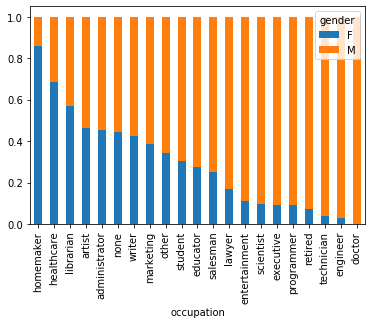

In [116]:
# Create a stacked barchart showing the results above
gender_counts = users.groupby(['occupation']).gender.value_counts(normalize=True).unstack().sort_values(by='F', ascending=False)
gender_counts.plot.bar(stacked=True)

In [18]:
# Extract the first digit of each zip code 
# and create a new column called 'region' that maps the
# first digit of the zip to new values using this dictionary:
d = {'0': 'New England',
'1': 'Mid-Atlantic',
'2': 'Central East Coast',
'3': 'The South',
'4': 'Midwest',
'5': 'Northern Great Plains',
'6': 'Central Great Plains',
'7': 'Southern Central',
'8': 'Mountain Desert',
'9': 'West Coast'} 

# print the first 5 rows of the result

In [19]:
users['region'] = users.apply(lambda row: d.get(row.zip_code[0]), axis=1)

In [20]:
users

,age,gender,occupation,zip_code,region
user_id,,,,,
1,24,M,technician,85711,Mountain Desert
2,53,F,other,94043,West Coast
3,23,M,writer,32067,The South
4,24,M,technician,43537,Midwest
5,33,F,other,15213,Mid-Atlantic
...,...,...,...,...,...
939,26,F,student,33319,The South
940,32,M,administrator,02215,New England
941,20,M,student,97229,West Coast


In [167]:
# for the occuptation 'retired', find the mean age of each region
users[users.occupation == 'retired'].groupby('region').mean().sort_values(by='age')

,age
region,
Central Great Plains,59.5
Central East Coast,60.0
Mid-Atlantic,60.0
West Coast,60.5
Northern Great Plains,61.0
New England,65.0
Midwest,69.0
The South,73.0
